In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from API_Keys import Alpha_API_Key
from API_Keys import Nasdaq_Key
from pprint import pprint
import json

In [3]:
#API Call

Treasury_url= f'https://data.nasdaq.com/api/v3/datasets/USTREASURY/YIELD.json?api_key={Nasdaq_Key}'

In [4]:
Nresponse= requests.get(Treasury_url).json()

In [ ]:
pprint(Nresponse)

In [ ]:
type(Nresponse['dataset'])

In [5]:
Treasury_DF=pd.DataFrame.from_dict(Nresponse['dataset']['data'])

In [ ]:
Treasury_DF.head(10)

In [ ]:
type(Treasury_DF)

In [6]:
Treasury_DF.rename(columns={0: "Date", 1:'1 mo', 2:'2 mo', 3:'3 mo', 4:'6 mo', 5:'1 yr', 6:'2 yr', 7:'3 yr', 8:'5 yr', 9:'7 yr', 10:'10 yr', 11:'20 yr', 12:'30 yr'}, inplace=True)

In [7]:
Treasury_DF.head()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,2022-01-25,0.05,0.09,0.19,0.39,0.65,1.02,1.28,1.56,1.73,1.78,2.18,2.12
1,2022-01-24,0.05,0.09,0.19,0.39,0.58,0.99,1.25,1.53,1.69,1.75,2.15,2.10
2,2022-01-21,0.05,0.08,0.17,0.35,0.58,1.01,1.28,1.54,1.70,1.75,2.13,2.07
3,2022-01-20,0.05,0.09,0.17,0.36,0.60,1.08,1.34,1.62,1.77,1.83,2.19,2.14
4,2022-01-19,0.05,0.06,0.17,0.36,0.57,1.04,1.33,1.62,1.78,1.83,2.20,2.14


In [8]:
# add columns to dataframe calculating delta between durations

Treasury_DF['2mo-1mo']=(Treasury_DF['2 mo'].astype(float)) - (Treasury_DF['1 mo'].astype(float))
                          
Treasury_DF['3mo-2mo']=(Treasury_DF['3 mo'].astype(float)) - (Treasury_DF['2 mo'].astype(float))

Treasury_DF['3mo-1mo']=(Treasury_DF['3 mo'].astype(float)) - (Treasury_DF['1 mo'].astype(float))

Treasury_DF['6mo-3mo']=(Treasury_DF['6 mo'].astype(float)) - (Treasury_DF['3 mo'].astype(float))
                          
Treasury_DF['6mo-2mo']=(Treasury_DF['6 mo'].astype(float)) - (Treasury_DF['2 mo'].astype(float))

Treasury_DF['6mo-1mo']=(Treasury_DF['6 mo'].astype(float)) - (Treasury_DF['1 mo'].astype(float))
                          
Treasury_DF['1yr-6mo']=(Treasury_DF['1 yr'].astype(float)) - (Treasury_DF['6 mo'].astype(float))
                         
Treasury_DF['1yr-3mo']=(Treasury_DF['1 yr'].astype(float)) - (Treasury_DF['3 mo'].astype(float))
                          
Treasury_DF['1yr-2mo']=(Treasury_DF['1 yr'].astype(float)) - (Treasury_DF['2 mo'].astype(float))
                          
Treasury_DF['1yr-1mo']=(Treasury_DF['1 yr'].astype(float)) - (Treasury_DF['1 mo'].astype(float))
                          
Treasury_DF['2yr-1yr']=(Treasury_DF['2 yr'].astype(float)) - (Treasury_DF['1 yr'].astype(float))

Treasury_DF['2yr-6mo']=(Treasury_DF['2 yr'].astype(float)) - (Treasury_DF['6 mo'].astype(float))
                          
Treasury_DF['2yr-1mo']=(Treasury_DF['2 yr'].astype(float)) - (Treasury_DF['1 mo'].astype(float))

Treasury_DF['3yr-1yr']=(Treasury_DF['3 yr'].astype(float)) - (Treasury_DF['1 yr'].astype(float))

Treasury_DF['5-1year']=(Treasury_DF['5 yr'].astype(float)) - (Treasury_DF['1 yr'].astype(float))

Treasury_DF["10yr-3mo"]=(Treasury_DF['10 yr'].astype(float)) - (Treasury_DF['3 mo'].astype(float))

Treasury_DF["10-1year"]=(Treasury_DF['10 yr'].astype(float)) - (Treasury_DF['1 yr'].astype(float))

Treasury_DF["10-2year"]=(Treasury_DF['10 yr'].astype(float)) - (Treasury_DF['2 yr'].astype(float))

Treasury_DF["10-5year"]=(Treasury_DF['10 yr'].astype(float)) - (Treasury_DF['5 yr'].astype(float))

Treasury_DF["20-1year"]=(Treasury_DF['10 yr'].astype(float)) - (Treasury_DF['1 yr'].astype(float))

Treasury_DF["20-10year"]=(Treasury_DF['20 yr'].astype(float)) - (Treasury_DF['10 yr'].astype(float))

Treasury_DF["30-20year"]=(Treasury_DF['30 yr'].astype(float)) - (Treasury_DF['20 yr'].astype(float))


In [ ]:
type(Treasury_DF['Date'][2])

In [9]:
# Change date from string to timestamp

Treasury_DF['Date']=pd.to_datetime(Treasury_DF['Date'])

Treasury_DF.head()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,...,2yr-1mo,3yr-1yr,5-1year,10yr-3mo,10-1year,10-2year,10-5year,20-1year,20-10year,30-20year
0,2022-01-25,0.05,0.09,0.19,0.39,0.65,1.02,1.28,1.56,1.73,...,0.97,0.63,0.91,1.59,1.13,0.76,0.22,1.13,0.40,-0.06
1,2022-01-24,0.05,0.09,0.19,0.39,0.58,0.99,1.25,1.53,1.69,...,0.94,0.67,0.95,1.56,1.17,0.76,0.22,1.17,0.40,-0.05
2,2022-01-21,0.05,0.08,0.17,0.35,0.58,1.01,1.28,1.54,1.70,...,0.96,0.70,0.96,1.58,1.17,0.74,0.21,1.17,0.38,-0.06
3,2022-01-20,0.05,0.09,0.17,0.36,0.60,1.08,1.34,1.62,1.77,...,1.03,0.74,1.02,1.66,1.23,0.75,0.21,1.23,0.36,-0.05
4,2022-01-19,0.05,0.06,0.17,0.36,0.57,1.04,1.33,1.62,1.78,...,0.99,0.76,1.05,1.66,1.26,0.79,0.21,1.26,0.37,-0.06


In [ ]:
Treasury_DF.columns

In [ ]:
type(Treasury_DF['Date'][1])

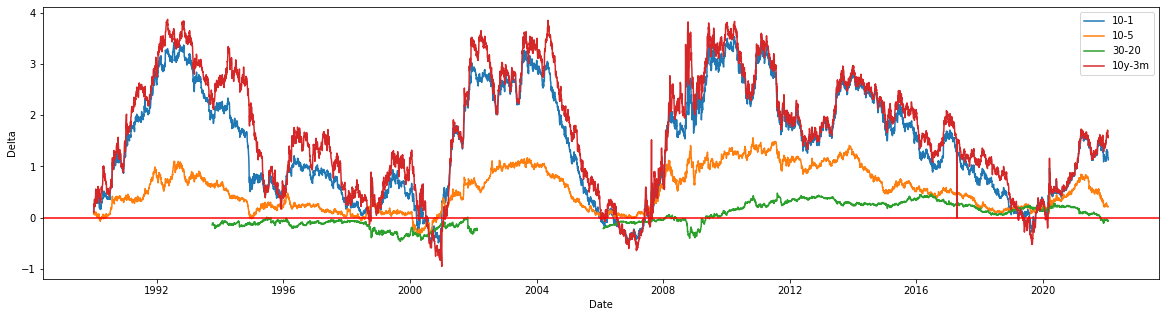

In [11]:
plt.figure(figsize=(20,5))
plt.plot(Treasury_DF['Date'], Treasury_DF['10-1year'], label='10-1')
plt.plot(Treasury_DF['Date'], Treasury_DF['10-5year'], label='10-5')
plt.plot(Treasury_DF['Date'], Treasury_DF['30-20year'], label='30-20')
plt.plot(Treasury_DF['Date'], Treasury_DF['10yr-3mo'], label='10y-3m')
plt.axhline(y=0, color='r')

# x_axis= np.arange(len(Yields_DF['Date']))
# tick_locations= [value for value in x_axis]
# plt.xticks(tick_locations, Yields_DF['Date'], rotation=90)

plt.legend()

plt.xlabel('Date')
plt.ylabel('Delta')
plt.show()

Get Data for Nasdaq to compare to Treasury yields

In [ ]:
url= f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=QQQ&outputsize=full&apikey={Alpha_API_Key}'

In [ ]:
response= requests.get(url).json()

In [ ]:
pprint(response)

In [ ]:
type(response)

In [ ]:
# Turn dictionary into DataFrame

Nasdaq= pd.DataFrame.from_dict(response['Time Series (Daily)'], orient='index')

In [ ]:
Nasdaq

In [ ]:
# Reset index to make date a usable column and clean up column names

Nasdaq=Nasdaq.reset_index()
Nasdaq.rename(columns={'index': 'Date', '1. open':'Nas_Open', '2. high':'Nas_High', '3. low':'Nas_Low', '4. close':'Nas_Close', '5. volume':'Nas_Volume'}, inplace=True)

In [ ]:
# Create new column for daily change and range

Nasdaq['Nas_Change']=Nasdaq['Nas_Close'].astype(float).diff(periods=-1)

Nasdaq['Nas_Range']=Nasdaq['Nas_High'].astype(float) - Nasdaq['Nas_Low'].astype(float)

In [ ]:
Nasdaq['Date']=pd.to_datetime(Nasdaq['Date'])
type(Nasdaq['Date'][1])

In [ ]:
Nasdaq['Nas_Open']=Nasdaq['Nas_Open'].astype(float)
Nasdaq['Nas_Close']=Nasdaq['Nas_Close'].astype(float)
Nasdaq['Nas_Volume']=Nasdaq['Nas_Volume'].astype(float)
Nasdaq['Nas_High']=Nasdaq['Nas_High'].astype(float)
Nasdaq['Nas_Low']=Nasdaq['Nas_Low'].astype(float)

In [ ]:
# # Delete high and low rows.   Keep for volatility measure
# Nasdaq.drop(axis=1, columns=['high', 'low'], inplace=True)

In [ ]:
Nasdaq.head(5)

In [ ]:
print(Nasdaq.dtypes)

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(Nasdaq['Date'],Nasdaq['Nas_Close'])
plt.plot(Nasdaq['Date'], Nasdaq['Nas_Change'])

# ax.set(
#     xlabel='Date',
#     ylabel='Change',
#     xlim=['2021-06-01', '2021-12-15'])
# x_axis= np.arange(len(Yields_DF['Date']))
# tick_locations= [value for value in x_axis]
# plt.xticks(tick_locations, Yields_DF['Date'], rotation=90)

plt.show()

Change is not useful for chart, but may be helpful for ML

In [ ]:
# plt.figure(figsize=(20,10))
# plt.plot(Data_DF['Date'], Data_DF['10-1year']*300, label='10-1year')
# plt.plot(Data_DF['Date'], Data_DF['10-5year']*400, label='10-5year')

# plt.plot(Data_DF['Date'], Data_DF['Nas_Close'].astype(float)*5, label='Nas_Close')
# plt.legend()
# plt.plot(ylim=(-50,435))
# plt.axhline(y=0, color='r')

# plt.show()

Get Data for S&P500

In [ ]:
url= f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey={Alpha_API_Key}'

In [ ]:
SPresponse= requests.get(url).json()

In [ ]:
pprint(SPresponse)

In [ ]:
SP500= pd.DataFrame.from_dict(SPresponse['Time Series (Daily)'], orient='index')

In [ ]:

SP500=SP500.reset_index()
SP500.rename(columns={'index': 'Date', '1. open':'SP_Open', '2. high':'SP_High', '3. low':'SP_Low', '4. close':'SP_Close', '5. volume':'SP_Volume'}, inplace=True)

In [ ]:
SP500['Date']=pd.to_datetime(SP500['Date'])
type(SP500['Date'][1])

In [ ]:
# SP500.drop(axis=1, columns=['high', 'low'], inplace=True)

In [ ]:
# Add Change column and Range

SP500['SP500_Change']=SP500['SP_Close'].astype(float).diff(-1)

SP500['SP_Range']=SP500['SP_High'].astype(float) - SP500['SP_Low'].astype(float)

SP500.head(5)

In [ ]:
print(SP500.dtypes)

In [ ]:
SP500['SP_Open']=SP500['SP_Open'].astype(float)
SP500['SP_Close']=SP500['SP_Close'].astype(float)
SP500['SP_Volume']=SP500['SP_Volume'].astype(float)
SP500['SP_High']=SP500['SP_High'].astype(float)
SP500['SP_Low']=SP500['SP_Low'].astype(float)

In [ ]:
print(SP500.dtypes)

In [ ]:
SP500.head(3)

Get Data for Dow

In [ ]:
url= f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=DIA&outputsize=full&apikey={Alpha_API_Key}'

In [ ]:
DOWresponse= requests.get(url).json()

In [ ]:
pprint(DOWresponse)

In [ ]:
DOW_DF=pd.DataFrame.from_dict(DOWresponse['Time Series (Daily)'], orient='index')

In [ ]:
DOW_DF.head(2)

In [ ]:
DOW_DF=DOW_DF.reset_index()
DOW_DF.head(2)

In [ ]:
DOW_DF.rename(columns={'index': 'Date', '1. open': 'DOW_Open', '2. high': 'DOW_High', '3. low': 'DOW_Low', '4. close': 'DOW_Close', '5. volume': 'DOW_Volume'}, inplace=True)

In [ ]:
print(DOW_DF.dtypes)

In [ ]:
DOW_DF['Date']=pd.to_datetime(DOW_DF['Date'])
DOW_DF['DOW_Open']=DOW_DF['DOW_Open'].astype(float)
DOW_DF['DOW_Close']=DOW_DF['DOW_Close'].astype(float)
DOW_DF['DOW_Volume']=DOW_DF['DOW_Volume'].astype(float)
DOW_DF['DOW_High']=DOW_DF['DOW_High'].astype(float)
DOW_DF['DOW_Low']=DOW_DF['DOW_Low'].astype(float)

In [ ]:
DOW_DF['DOW_Change']=DOW_DF['DOW_Close'].diff(-1)

DOW_DF['DOW_Range']=DOW_DF['DOW_High'] - DOW_DF['DOW_Low']

In [ ]:
DOW_DF.head(4)

In [ ]:
print(DOW_DF.dtypes)

In [ ]:
# Merge all data to one DataFrame

Data=pd.merge(Treasury_DF, Nasdaq, on='Date', how='inner')
Data=pd.merge(Data, SP500, on='Date', how='inner')
Data=pd.merge(Data, DOW_DF, on='Date', how='inner')

In [ ]:
# Round to 2 decimal places

Data=Data.round(2)

Data.head(5)

In [ ]:
# Drp last row with NaN valuse for change columns

Data.drop(5541, axis=0, inplace=True)

In [ ]:
print(Data.columns)

In [ ]:
plt.figure(figsize=(35,15))
plt.plot(Data['Date'], Data['10-1year']*300, label='10-1year')
plt.plot(Data['Date'], Data['10yr-3mo']*400, label='10y-3m')
# plt.plot(Data['Date'], Data['5-1year']*400, label='5-1yr')
# plt.plot(Data['Date'], Data['30-20year']*400, label='30-20yr')

plt.plot(Data['Date'], Data['Nas_Close']*5, label='Nas_Close')
plt.plot(Data['Date'], Data['SP_Close']*5, label='SP5_Close')
plt.plot(Data['Date'], Data['DOW_Close']*5, label='DOW_Close')

         
plt.legend()
plt.plot(ylim=(-50,435))
plt.axhline(y=0, color='r')

plt.show()

In [ ]:
# Export CSV for Tableau

Data.to_csv('Treasury_Yield_CSV.csv')

Make new columns for daily changes of yields and volume, Then look for Correlations.  Create categories for changes?

In [ ]:
# Yield change from previous day.  Change (or direction of change) is probably more useful than yield itself

Data['1mo_change']=Data['1 mo'].diff(-1)
Data['2mo_change']=Data['2 mo'].diff(-1)
Data['3mo_change']=Data['3 mo'].diff(-1)
Data['6mo_change']=Data['6 mo'].diff(-1)
Data['1yr_change']=Data['1 yr'].diff(-1)
Data['2yr_change']=Data['2 yr'].diff(-1)
Data['3yr_change']=Data['3 yr'].diff(-1)
Data['5yr_change']=Data['5 yr'].diff(-1)
Data['7yr_change']=Data['7 yr'].diff(-1)
Data['10yr_change']=Data['10 yr'].diff(-1)
Data['20yr_change']=Data['20 yr'].diff(-1)
Data['30yr_change']=Data['30 yr'].diff(-1)

In [ ]:
##  Change in yield spread is probably more useful than spread itself.  Is delta narrowing or widening?

Data['2mo-1mo_change']=Data['2mo-1mo'].diff(-1)
                          
Data['3mo-2mo_change']=Data['3mo-2mo'].diff(-1)

Data['3mo-1mo_change']=Data['3mo-1mo'].diff(-1)

Data['6mo-3mo_change']=Data['6mo-3mo'].diff(-1)
                          
Data['6mo-2mo_change']=Data['6mo-2mo'].diff(-1)

Data['6mo-1mo_change']=Data['6mo-1mo'].diff(-1)
                          
Data['1yr-6mo_change']=Data['1yr-6mo'].diff(-1)
                         
Data['1yr-3mo_change']=Data['1yr-3mo'].diff(-1)
                          
Data['1yr-2mo_change']=Data['1yr-2mo'].diff(-1)
                          
Data['1yr-1mo_change']=Data['1yr-1mo'].diff(-1)
                          
Data['2yr-1yr_change']=Data['2yr-1yr'].diff(-1)

Data['2yr-6mo_change']=Data['2yr-6mo'].diff(-1)
                          
Data['2yr-1mo_change']=Data['2yr-1mo'].diff(-1)

Data['3yr-1yr_change']=Data['3yr-1yr'].diff(-1)

Data['5-1year_change']=Data['5-1year'].diff(-1)

Data["10yr-3mo_change"]=Data["10yr-3mo"].diff(-1)

Data["10-1year_change"]=Data["10-1year"].diff(-1)

Data["10-2year_change"]=Data["10-2year"].diff(-1)

Data["10-5year_change"]=Data["10-5year"].diff(-1)

Data["20-1year_change"]=Data["20-1year"].diff(-1)

Data["20-10year_change"]=Data["20-10year"].diff(-1)

Data["30-20year_change"]=Data["30-20year"].diff(-1)


In [ ]:
#  Make column for next day's closing prices and next day's change (Labels)

Data['Nas_Tomorrow']=Data['Nas_Close'].shift(1)

Data['Nas_Tomorrows_Change']=Data['Nas_Change'].shift(1)

Data['SP500_Tomorrow']=Data['SP_Close'].shift(1)

Data['SP500_Tomorrows_Change']=Data['SP500_Change'].shift(1)

Data['DOW_Tomorrow']=Data['DOW_Close'].shift(1)

Data['DOW_Tomorrows_Change']=Data['DOW_Change'].shift(1)

In [ ]:
# Add columns for tomorrow's percentage change.  Trying to predict next day's change, not today's.

Data['Nas_Tomorrow_%_change']=(Data['Nas_Tomorrows_Change']/Data['Nas_Tomorrow'].shift(-1))*100

Data['SP_Tomorrow_%_change']=(Data['SP500_Tomorrows_Change']/Data['SP500_Tomorrow'].shift(-1))*100

Data['DOW_Tomorrow_%_change']=(Data['DOW_Tomorrows_Change']/Data['DOW_Tomorrow'].shift(-1))*100

In [ ]:
# Convert Yield Changes to percentages

Data['2mo-1mo_%_change']=(Data['2mo-1mo_change']/Data['2mo-1mo'].shift(-1))*100
                          
Data['3mo-2mo_%_change']=(Data['3mo-2mo_change']/Data['3mo-2mo'].shift(-1))*100

Data['3mo-1mo_%_change']=Data['3mo-1mo_change']/Data['3mo-1mo'].shift(-1)*100

Data['6mo-3mo_%_change']=Data['6mo-3mo_change']/Data['6mo-3mo'].shift(-1)*100
                          
Data['6mo-2mo_%_change']=Data['6mo-2mo_change']/Data['6mo-2mo'].shift(-1)*100

Data['6mo-1mo_%_change']=Data['6mo-1mo_change']/Data['6mo-1mo'].shift(-1)*100
                          
Data['1yr-6mo_%_change']=Data['1yr-6mo_change']/Data['1yr-6mo'].shift(-1)*100
                         
Data['1yr-3mo_%_change']=Data['1yr-3mo_change']/Data['1yr-3mo'].shift(-1)*100
                          
Data['1yr-2mo_%_change']=Data['1yr-2mo_change']/Data['1yr-2mo'].shift(-1)*100
                          
Data['1yr-1mo_%_change']=Data['1yr-1mo_change']/Data['1yr-1mo'].shift(-1)*100
                          
Data['2yr-1yr_%_change']=Data['2yr-1yr_change']/Data['2yr-1yr'].shift(-1)*100

Data['2yr-6mo_%_change']=Data['2yr-6mo_change']/Data['2yr-6mo'].shift(-1)*100
                          
Data['2yr-1mo_%_change']=Data['2yr-1mo_change']/Data['2yr-1mo'].shift(-1)*100

Data['3yr-1yr_%_change']=Data['3yr-1yr_change']/Data['3yr-1yr'].shift(-1)*100

Data['5-1year_%_change']=Data['5-1year_change']/Data['5-1year'].shift(-1)*100

Data["10yr-3mo_%_change"]=Data["10yr-3mo_change"]/Data['10yr-3mo'].shift(-1)*100

Data["10-1year_%_change"]=Data["10-1year_change"]/Data['10-1year'].shift(-1)*100

Data["10-2year_%_change"]=Data["10-2year_change"]/Data['10-2year'].shift(-1)*100

Data["10-5year_%_change"]=Data["10-5year_change"]/Data['10-5year'].shift(-1)*100

Data["20-1year_%_change"]=Data["20-1year_change"]/Data['20-1year'].shift(-1)*100

Data["20-10year_%_change"]=Data["20-10year_change"]/Data['20-10year'].shift(-1)*100

Data["30-20year_%_change"]=Data["30-20year_change"]/Data['30-20year'].shift(-1)*100


In [ ]:
# Index Positive or negative changes.  Simplify to direction of movement rather than values.

conditions = [
    (Data['Nas_Tomorrows_Change']>0),
    (Data['Nas_Tomorrows_Change']<0),
    (Data['Nas_Tomorrows_Change']==0)
]

values=[1, -1, 0]

Data['Nas_Tomorrow_+-']=np.select(conditions, values)

In [ ]:
#  Column for positive or negative yield spread movement

Tconditions = [
    (Data['3mo-2mo_change']>0),
    (Data['3mo-2mo_change']<0),
    (Data['3mo-2mo_change']==0)
]

Tvalues=[1, -1, 0]

Data['3mo-2mo+-']=np.select(Tconditions, Tvalues)

In [ ]:
# Column for next week movement up or down.  5 market days ahead

In [ ]:
pd.set_option('display.max_columns', None)

Data=Data.round(2)
               
Data.head(6)

In [ ]:
corr_matrix= Data.corr()

In [ ]:
pd.set_option('display.max_rows', None)

corr_matrix['Nas_Tomorrow_+-'].sort_values(ascending=False).round(4)

Use yield curve and ML to predict next day market change and next week average market change(Regression).  Maybe as simple as categorical model. Will market go up or down.
